In [31]:
from sklearn.datasets import fetch_california_housing

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [32]:
feature, target = fetch_california_housing(as_frame=True, return_X_y=True)

In [33]:
feature

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
data = fetch_california_housing()

In [35]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [36]:
print(data.target_names)

['MedHouseVal']


In [37]:
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### EDA

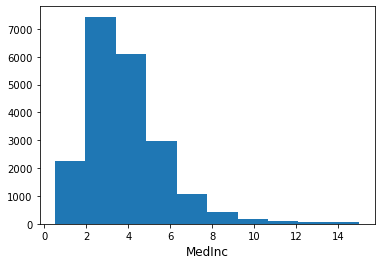

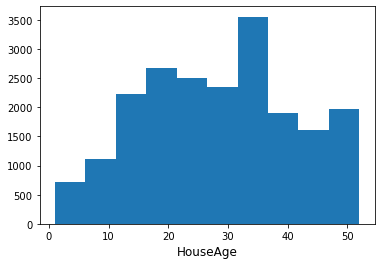

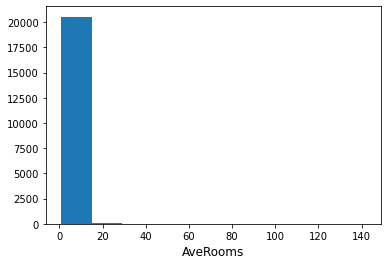

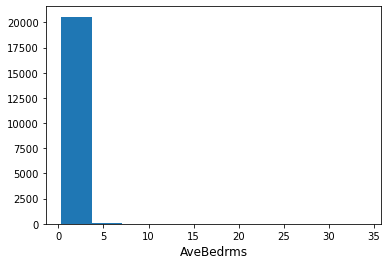

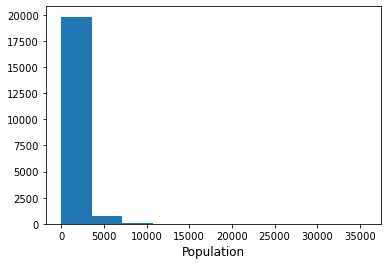

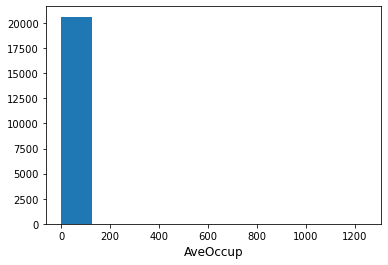

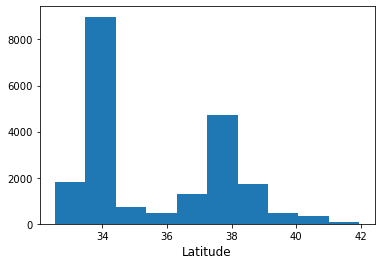

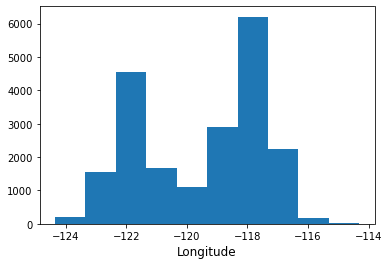

In [49]:
for i in feature:
    plt.hist(feature[i])
    plt.xlabel(i, size=12)
    plt.show()

<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

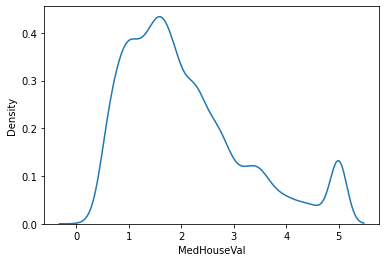

In [62]:
sns.kdeplot(target) # bimodal

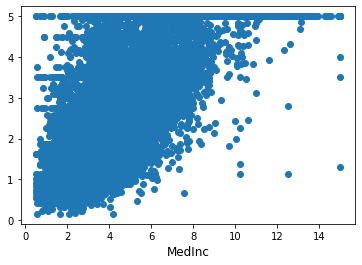

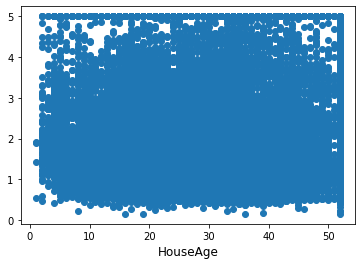

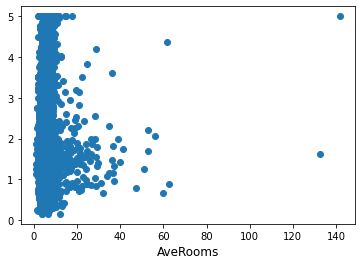

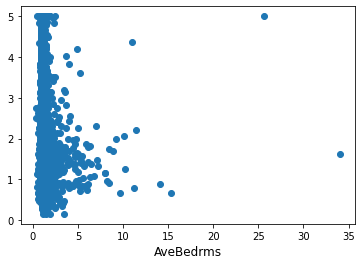

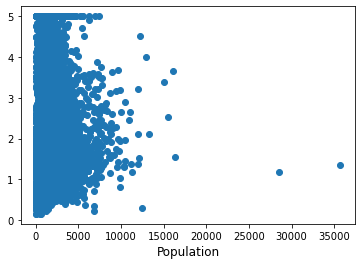

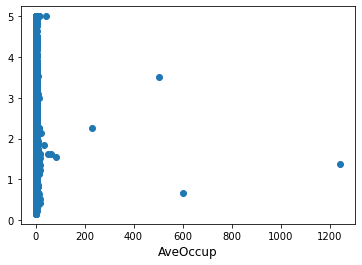

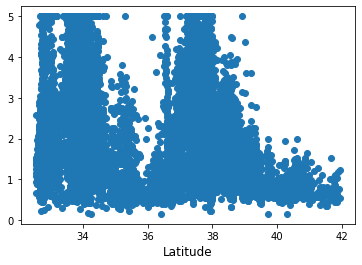

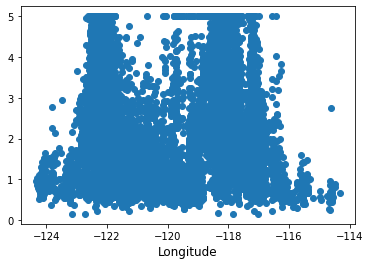

In [63]:
for i in feature:
    plt.scatter(feature[i], target)
    plt.xlabel(i, size=12)
    plt.show()

In [64]:
feature.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [65]:
feature.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [68]:
len(feature[feature.duplicated()])

0

In [69]:
feature.corrwith(target)

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
vif_data = pd.DataFrame()

In [102]:
vif_data["feature"] = feature.columns

In [104]:
vif_data["VIF"] = [variance_inflation_factor(feature.values, i)
                          for i in range(len(feature.columns))]
  
print(vif_data)

      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


Avg bedroom and avg room have high multi collinearity

In [111]:
# Removing multicollinearity from the dataset using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
# compare with each columns
col= feature.columns
for i in range(len(col)):
    vif_list = [vif(feature[col].values, index) for index in range(len(col))]
    maxvif = max(vif_list)
    print("Max VIF value is ", maxvif)                     
    drop_index = vif_list.index(maxvif)
    print("For Independent variable", col[drop_index])
    
    if maxvif > 10:
        
        print("Deleting", col[drop_index])
        col = col.delete(drop_index)
print("---------------")
print("Final Independent_variables ", col)

Max VIF value is  633.7116543669108
For Independent variable Longitude
Deleting Longitude
Max VIF value is  42.19222281556577
For Independent variable AveRooms
Deleting AveRooms
Max VIF value is  21.92251505242192
For Independent variable Latitude
Deleting Latitude
Max VIF value is  4.263505557257355
For Independent variable AveBedrms
Max VIF value is  4.263505557257355
For Independent variable AveBedrms
Max VIF value is  4.263505557257355
For Independent variable AveBedrms
Max VIF value is  4.263505557257355
For Independent variable AveBedrms
Max VIF value is  4.263505557257355
For Independent variable AveBedrms
---------------
Final Independent_variables  Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup'], dtype='object')


In [117]:
X= feature[col].values

In [118]:
y= target.values

In [129]:
len(X[:,4]),len(y)

(20640, 20640)

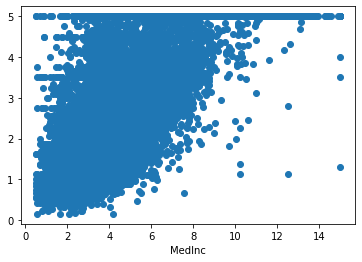

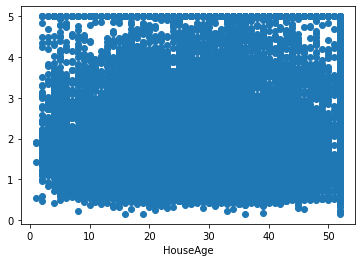

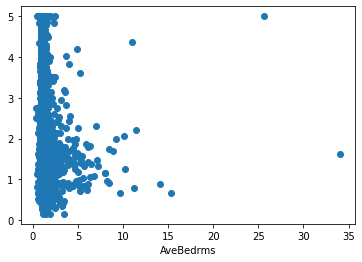

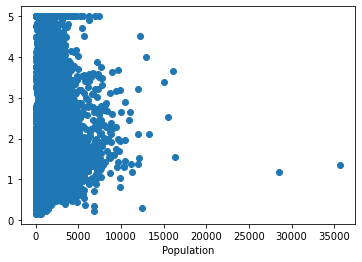

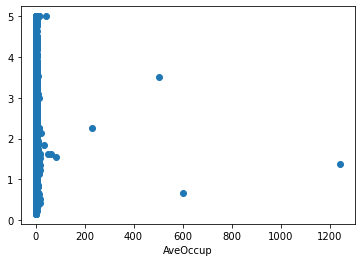

In [133]:
for i in range(X.shape[1]):
    plt.scatter(X[:,i], y)
    plt.xlabel(col[i])
    plt.show()

### Multi-Variate Regression

##### dropping aveoccupation and population column as there variables are not linearly related with the target variable

In [143]:
col= col.delete(4)


In [144]:
col= col.delete(3)

In [151]:
from sklearn.model_selection import train_test_split

In [166]:
xtrain, xtest, ytrain,ytest= train_test_split(feature[col].values, target.values, train_size= 0.75)

In [167]:
df= pd.DataFrame(xtrain, columns= col)

In [168]:
df['MedHouseVal']= ytrain

In [169]:
df.head(4)

,MedInc,HouseAge,AveBedrms,MedHouseVal
0,2.1494,37.0,1.097514,1.32500
1,1.8333,38.0,1.131868,1.27100
2,7.4185,35.0,0.958763,5.00001
3,10.3942,39.0,0.973214,5.00001


In [161]:
## model with no interaction

In [195]:
from statsmodels.formula.api import ols
model = ols("MedHouseVal ~ MedInc+ HouseAge+AveBedrms",
data=df)
model = model.fit()
print(model.params)
print("---------")
print(model.summary())

Intercept   -0.119846
MedInc       0.433195
HouseAge     0.017723
AveBedrms    0.003006
dtype: float64
---------
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     5491.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:26:52   Log-Likelihood:                -18670.
No. Observations:               15480   AIC:                         3.735e+04
Df Residuals:                   15476   BIC:                         3.738e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

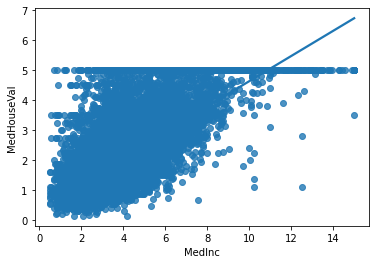

In [163]:
sns.regplot(x="MedInc",y="MedHouseVal",data=df,ci=None)
plt.show()

<Figure size 720x576 with 0 Axes>

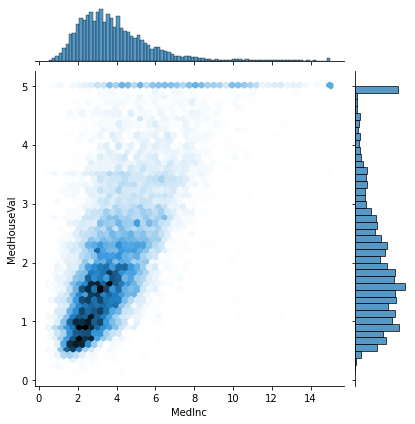

In [164]:
plt.figure(figsize=(10,8))
sns.jointplot(x="MedInc",y="MedHouseVal",data=df, kind='hex')
plt.show()

### Predicting

In [176]:
dftest= pd.DataFrame(xtest, columns= col)

In [177]:
dftest

,MedInc,HouseAge,AveBedrms
0,2.7292,32.0,1.086124
1,8.3678,34.0,1.044260
2,3.7500,26.0,1.000000
3,2.8795,44.0,1.166197
4,4.2813,52.0,1.043478
...,...,...,...
5155,2.3950,25.0,1.146965
5156,3.9156,23.0,1.136454
5157,4.6500,36.0,1.006105
5158,3.5469,15.0,1.629412


In [178]:
model.predict(dftest)

0       1.632832
1       4.110768
2       1.968441
3       1.910858
4       2.659527
          ...   
5155    1.364180
5156    1.987420
5157    2.535565
5158    1.687398
5159    2.607798
Length: 5160, dtype: float64

More explanatory variables increases R .
Too many explanatory variables causes over, ing.
Adjusted coe)cient of determination penalizes more explanatory variables.
Penalty is noticeable when R is small, or n is large fraction of n .
In statsmodels , it's contained in the rsquared_adj a ribute.


In [179]:
model.rsquared_adj

0.5155192309264314

In [180]:
rse = np.sqrt(model.mse_resid)
print("residual standard error: ", rse) # this tell that the difference between actual and predicted is 0.808

residual standard error:  0.808380403772973


#### model with implicit interaction

In [181]:
from statsmodels.formula.api import ols
model = ols("MedHouseVal ~ MedInc* HouseAge*AveBedrms ",
data=df)
model = model.fit()
print(model.params)
print("---------")
print(model.summary())

Intercept                   -0.105204
MedInc                       0.438778
HouseAge                     0.018896
MedInc:HouseAge             -0.000582
AveBedrms                    0.110248
MedInc:AveBedrms            -0.034765
HouseAge:AveBedrms          -0.005174
MedInc:HouseAge:AveBedrms    0.001571
dtype: float64
---------
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     2359.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:59:00   Log-Likelihood:                -18659.
No. Observations:               15480   AIC:                         3.733e+04
Df Residuals:                   15472   BIC:                         3.740e+04
Df Model:                           7  

In [182]:
rse = np.sqrt(model.mse_resid)
print("residual standard error: ", rse) # this tell that the difference between actual and predicted is 0.807

residual standard error:  0.8079198906271998


In [183]:
## prediction

In [186]:
prediction_data = dftest.assign(
MedHouseVal = model.predict(dftest))
prediction_data.head()

,MedInc,HouseAge,AveBedrms,MedHouseVal
0,2.7292,32.0,1.086124,1.631987
1,8.3678,34.0,1.044260,4.137488
2,3.7500,26.0,1.000000,1.973238
3,2.8795,44.0,1.166197,1.894328
4,4.2813,52.0,1.043478,2.670167


### Optimisation using gradient descent

In [187]:
from scipy.optimize import minimize

In [217]:
def cost_function(params, xtrain, ytrain):
    m = xtrain.shape[0]
    theta0, theta1, theta2, theta3 = params
    y_pred = theta0 + theta1 * xtrain[:,0] + theta2 * xtrain[:,1] + theta3 * xtrain[:,2]
    cost = 1/(2*m) * np.sum((y_pred - ytrain)**2)
    return cost

In [218]:
def gradient(params, xtrain, ytrain):
    m = xtrain.shape[0]
    theta0, theta1, theta2, theta3 = params
    y_pred = theta0 + theta1 * xtrain[:,0] + theta2 * xtrain[:,1] + theta3 * xtrain[:,2]
    gradient_0 = 1/m * np.sum(y_pred - ytrain)
    gradient_1 = 1/m * np.sum((y_pred - ytrain) * xtrain[:,0])
    gradient_2 = 1/m * np.sum((y_pred - ytrain) * xtrain[:,1])
    gradient_3 = 1/m * np.sum((y_pred - ytrain) * xtrain[:,2])
    return np.array([gradient_0, gradient_1, gradient_2, gradient_3])


In [219]:
def gradient_descent(xtrain, ytrain, theta, alpha, num_iters):
    params = minimize(fun=cost_function, x0=theta, args=(xtrain, ytrain), method='BFGS', jac=gradient) 
    # using jac is optional
    #print(params)
    theta = params.x
    return theta

In [220]:
# Initialize the parameters
m = xtrain.shape[0]
theta = np.zeros(4)
alpha = 0.01
num_iters = 1000

# Optimize the parameters using gradient descent
theta_optimized = gradient_descent(xtrain, ytrain, theta, alpha, num_iters)


In [221]:
print("the coefficients of the model")
print("-------------")
print(theta_optimized)

the coefficients of the model
-------------
[-0.11985761  0.43319615  0.01772313  0.00301046]


In [222]:
print(model.params)  #model with no interaction

Intercept   -0.119846
MedInc       0.433195
HouseAge     0.017723
AveBedrms    0.003006
dtype: float64


##### Here we can see that the coeffiecients returned by the model are similar to the coefficients return by gradient descent algrithm. 